In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def van_der_pol(x, y, mu):
    """
    Defines the Van der Pol oscillator system of ODEs to calculate derivatives.

    Args:
        x (float): The current value of x.
        y (float): The current value of y.
        mu (float): The nonlinearity parameter.

    Returns:
        tuple: A tuple containing the derivatives (dx/dt, dy/dt).
    """
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return dxdt, dydt

def rk4_step(func, t, state, h, mu):
    """
    Performs one step of the 4th order Runge-Kutta method for a system of ODEs.

    Args:
        func (callable): The function defining the ODE system (e.g., van_der_pol_rk4_deriv).
        t (float): Current time.
        state (numpy.ndarray): Current state vector.
        h (float): Time step size.
        mu (float): Parameter for the ODE system.

    Returns:
        numpy.ndarray: The state vector at the next time step.
    """
    k1 = h * func(t, state, mu)
    k2 = h * func(t + h/2, state + k1/2, mu)
    k3 = h * func(t + h/2, state + k2/2, mu)
    k4 = h * func(t + h, state + k3, mu)
    return state + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

def van_der_pol_rk4_deriv(t, state, mu):
    """
    Wrapper for van_der_pol to be used with rk4_step expecting state array.
    """
    x, y = state
    return np.array(van_der_pol(x, y, mu))

def solve_van_der_pol_rk4(mu, initial_state, t_start, t_end, h):
    """
    Solves the Van der Pol oscillator using the RK4 method.

    Args:
        mu (float): The nonlinearity parameter.
        initial_state (list or numpy.ndarray): Initial values for [x, y].
        t_start (float): The starting time.
        t_end (float): The ending time.
        h (float): The time step size.

    Returns:
        tuple: A tuple containing numpy arrays of time points, x values, and y values.
    """
    num_steps = int((t_end - t_start) / h)
    time_points = np.linspace(t_start, t_end, num_steps + 1)
    x_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    state = np.array(initial_state)
    x_values[0] = state[0]
    y_values[0] = state[1]

    for i in range(num_steps):
        state = rk4_step(van_der_pol_rk4_deriv, time_points[i], state, h, mu)
        x_values[i+1] = state[0]
        y_values[i+1] = state[1]

    return x_values, y_values


(20, 20)
(20, 20)
Size of x_traj:  201
x_traj, y_traj:  1e-45 1e-45
x_traj, y_traj:  1.0972911458333332e-45 9.437341145833333e-46
x_traj, y_traj:  1.1883280174933539e-45 8.749142377975124e-46
x_traj, y_traj:  1.271857218899179e-45 7.936018205022306e-46
x_traj, y_traj:  1.3466380122908625e-45 6.999894586319798e-46
x_traj, y_traj:  1.4114556794213867e-45 5.94405643851742e-46
x_traj, y_traj:  1.465135301202072e-45 4.773183654405723e-46
x_traj, y_traj:  1.5065558360742156e-45 3.4933746760075053e-46
x_traj, y_traj:  1.5346643681806023e-45 2.1121567422980894e-46
x_traj, y_traj:  1.5484903880606324e-45 6.384820233554144e-47
x_traj, y_traj:  1.5471599612213168e-45 -9.172910430676769e-47
x_traj, y_traj:  1.5299096336689414e-45 -2.5434317800152254e-46
x_traj, y_traj:  1.49609991844366e-45 -4.226887103979659e-46
x_traj, y_traj:  1.4452282034960817e-45 -5.9533474614591416e-46
x_traj, y_traj:  1.3769409189876865e-45 -7.707329019518866e-46
x_traj, y_traj:  1.2910448013829183e-45 -9.4722721016169e-46

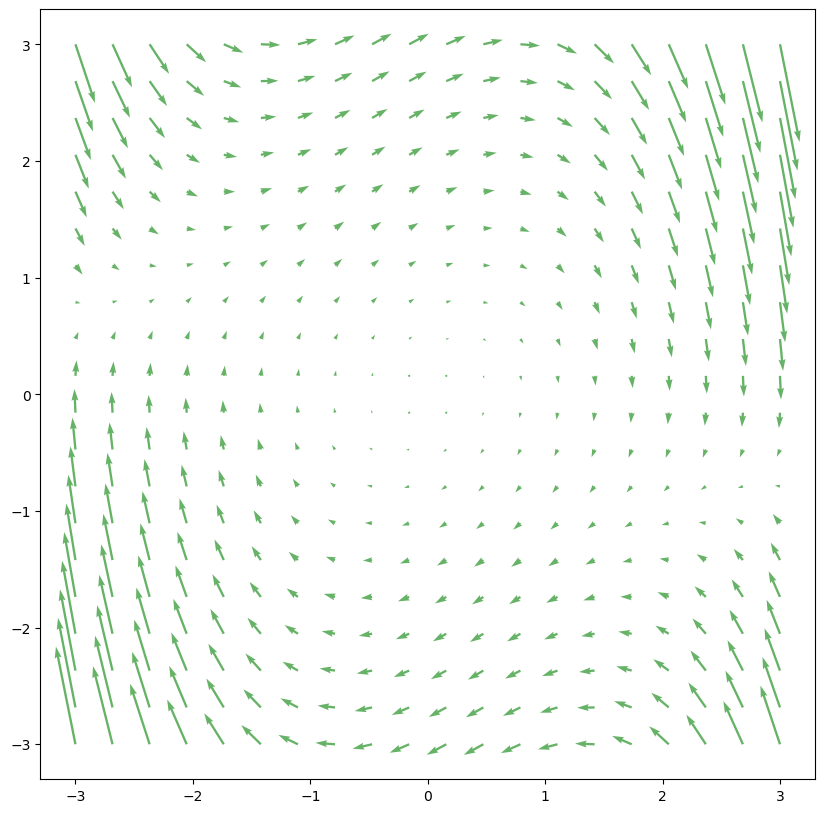

In [8]:
if __name__ == "__main__":
    # Set parameters
    mu_value = 0.5  # Choose a value for mu
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3
    grid_density = 20
    t_start = 0.0
    t_end = 20.0
    time_step = 0.1

    # Create a grid for the vector field
    x_vf = np.linspace(x_min, x_max, grid_density)
    y_vf = np.linspace(y_min, y_max, grid_density)
    X_vf, Y_vf = np.meshgrid(x_vf, y_vf)
    U, V = van_der_pol(X_vf, Y_vf, mu_value)
    print(U.shape)
    print(V.shape)

    # Define multiple initial conditions for the phase portrait
    #initial_conditions_list = [
    #    [1.0, 0.0],
    #    [2.0, 0.5],
    #    [-1.0, 1.5],
    #    [0.5, -2.0]
    #]
    initial_conditions_list = [[1e-45, 1e-45]]

    # Plotting
    plt.figure(figsize=(10, 10))

    # Plot the vector field
    plt.quiver(X_vf, Y_vf, U, V, color='g', alpha=0.6, label='Vector Field')

    # Plot the phase portraits for different initial conditions
    for initial_state in initial_conditions_list:
        x_traj, y_traj = solve_van_der_pol_rk4(mu_value, initial_state, t_start, t_end, time_step)
        print("Size of x_traj: ", len(x_traj))
        for k in range(len(x_traj)):
            print("x_traj, y_traj: ", x_traj[k], y_traj[k])
        plt.plot(x_traj, y_traj, label=f'Trajectory (x0={initial_state[0]}, y0={initial_state[1]})')

    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.title(f'Phase Portrait and Vector Field of Van der Pol Oscillator (μ = {mu_value})')
    #plt.xlim([x_min, x_max])
    #plt.ylim([y_min, y_max])
    #plt.grid(True)
    #plt.legend()
    #plt.show()